In [36]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
# Companies
business = pd.read_csv('datasets/businesses.csv')
business.head(5)

,business,year_founded,category_code,country_code
0,Hamoud Boualem,1878,CAT11,DZA
1,Communauté Électrique du Bénin,1968,CAT10,BEN
2,Botswana Meat Commission,1965,CAT1,BWA
3,Air Burkina,1967,CAT2,BFA
4,Brarudi,1955,CAT9,BDI


In [3]:
# Countrys
countries = pd.read_csv('datasets/countries.csv')
countries.head(5)

,country_code,country,continent
0,AFG,Afghanistan,Asia
1,AGO,Angola,Africa
2,ALB,Albania,Europe
3,AND,Andorra,Europe
4,ARE,United Arab Emirates,Asia


In [4]:
# Business category
categories = pd.read_csv('datasets/categories.csv')
categories.head(5)

,category_code,category
0,CAT1,Agriculture
1,CAT2,Aviation & Transport
2,CAT3,Banking & Finance
3,CAT4,"Cafés, Restaurants & Bars"
4,CAT5,Conglomerate


In [5]:
# Info
business.info(), countries.info(), categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business       163 non-null    object
 1   year_founded   163 non-null    int64 
 2   category_code  163 non-null    object
 3   country_code   163 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  195 non-null    object
 1   country       195 non-null    object
 2   continent     195 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_code  19 non-null     object
 1 

(None, None, None)

In [6]:
# Value counts
vc = countries.value_counts()
vc

country_code  country            continent    
AFG           Afghanistan        Asia             1
ROU           Romania            Europe           1
NAM           Namibia            Africa           1
NER           Niger              Africa           1
NGA           Nigeria            Africa           1
                                                 ..
GNQ           Equatorial Guinea  Africa           1
GRC           Greece             Europe           1
GRD           Grenada            North America    1
GTM           Guatemala          North America    1
ZWE           Zimbabwe           Africa           1
Length: 195, dtype: int64

In [7]:
# How many countries have more then 1
x = vc > 1
x.sum()

0

In [8]:
# Value counts
business.value_counts()

business                                        year_founded  category_code  country_code
1st National Bank of St Lucia                   1938          CAT3           LCA             1
Piraeus Bank                                    1606          CAT3           GRC             1
Munke Mølle                                     1135          CAT12          DNK             1
Myanmar National Airlines                       1948          CAT2           MMR             1
NamPost                                         1814          CAT16          NAM             1
                                                                                            ..
Development Bank of the Central African States  1975          CAT3           COG             1
Drohobych salt plant                            1250          CAT12          UKR             1
Egyptian National Railways                      1854          CAT2           EGY             1
Electricite du Laos                             1959   

In [9]:
# Category value counts
categories.value_counts()

category_code  category                         
CAT1           Agriculture                          1
CAT19          Tourism & Hotels                     1
CAT8           Defense                              1
CAT7           Consumer Goods                       1
CAT6           Construction                         1
CAT5           Conglomerate                         1
CAT4           Cafés, Restaurants & Bars            1
CAT3           Banking & Finance                    1
CAT2           Aviation & Transport                 1
CAT18          Telecommunications                   1
CAT10          Energy                               1
CAT17          Retail                               1
CAT16          Postal Service                       1
CAT15          Mining                               1
CAT14          Medical                              1
CAT13          Media                                1
CAT12          Manufacturing & Production           1
CAT11          Food & Beverages  

In [15]:
# Business value counts
business['category_code'].value_counts()

CAT3     37
CAT9     22
CAT2     19
CAT16    16
CAT12    15
CAT13     7
CAT4      6
CAT11     6
CAT1      6
CAT10     4
CAT17     4
CAT19     4
CAT15     3
CAT8      3
CAT5      3
CAT7      3
CAT6      2
CAT18     2
CAT14     1
Name: category_code, dtype: int64

In [29]:
# Are duplicates
business.duplicated().sum(), countries.duplicated().sum(), categories.duplicated().sum()

(0, 0, 0)

In [14]:
# Merge
old_df = business.merge(categories, how= 'inner', on= 'category_code').merge(countries, how= 'inner', on= 'country_code')
old_df 

,business,year_founded,category_code,country_code,category,country,continent
0,Hamoud Boualem,1878,CAT11,DZA,Food & Beverages,Algeria,Africa
1,M. M. Ispahani Limited,1820,CAT11,BGD,Food & Beverages,Bangladesh,Asia
2,George Steuart Group,1835,CAT11,LKA,Food & Beverages,Sri Lanka,Asia
3,Corporación Multi Inversiones,1920,CAT11,GTM,Food & Beverages,Guatemala,North America
4,Banks DIH,1840,CAT11,GUY,Food & Beverages,Guyana,South America
...,...,...,...,...,...,...,...
158,Raeapteek,1422,CAT14,EST,Medical,Estonia,Europe
159,Gostilna Gastuž,1467,CAT19,SVN,Tourism & Hotels,Slovenia,Europe
160,Gasthof Sternen,1230,CAT19,CHE,Tourism & Hotels,Switzerland,Europe
161,Çemberlitaş Hamamı,1584,CAT19,TUR,Tourism & Hotels,Turkey,Asia


In [31]:
# Drop
old_df = old_df.drop(labels=['category_code', 'country_code'], axis= 1)
old_df

,business,year_founded,category,country,continent
0,Hamoud Boualem,1878,Food & Beverages,Algeria,Africa
1,M. M. Ispahani Limited,1820,Food & Beverages,Bangladesh,Asia
2,George Steuart Group,1835,Food & Beverages,Sri Lanka,Asia
3,Corporación Multi Inversiones,1920,Food & Beverages,Guatemala,North America
4,Banks DIH,1840,Food & Beverages,Guyana,South America
...,...,...,...,...,...
158,Raeapteek,1422,Medical,Estonia,Europe
159,Gostilna Gastuž,1467,Tourism & Hotels,Slovenia,Europe
160,Gasthof Sternen,1230,Tourism & Hotels,Switzerland,Europe
161,Çemberlitaş Hamamı,1584,Tourism & Hotels,Turkey,Asia


In [62]:
# Companies founded before year 1000 CE
old_df.loc[old_df['year_founded'] < 1000]

,business,year_founded,category,country,continent
44,Staffelter Hof Winery,862,"Distillers, Vintners, & Breweries",Germany,Europe
126,The Royal Mint,886,Manufacturing & Production,United Kingdom,Europe
127,Monnaie de Paris,864,Manufacturing & Production,France,Europe
142,St. Peter Stifts Kulinarium,803,"Cafés, Restaurants & Bars",Austria,Europe
143,Sean's Bar,900,"Cafés, Restaurants & Bars",Ireland,Europe
148,Kongō Gumi,578,Construction,Japan,Asia


# Visuals

Text(0.5, 0, 'Year')

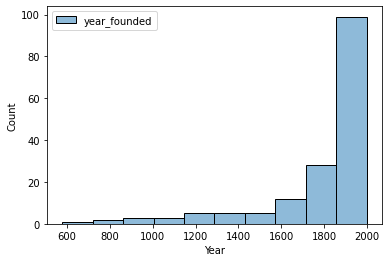

In [38]:
# Count by year
sns.histplot(data= old_df, bins= 10)
plt.xlabel('Year')

<AxesSubplot:xlabel='continent', ylabel='Count'>

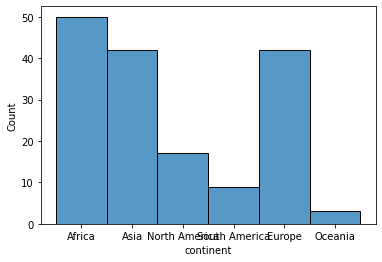

In [40]:
# Count by continent
sns.histplot(data= old_df, x='continent')

<AxesSubplot:xlabel='year_founded', ylabel='continent'>

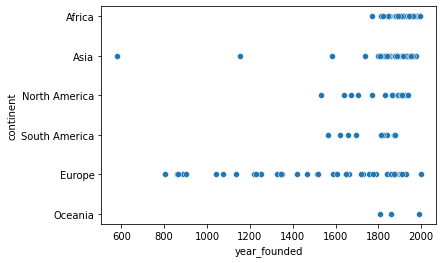

In [43]:
# Year_founded continent breakdown
sns.scatterplot(data= old_df, x= 'year_founded', y= 'continent')